<a href="https://colab.research.google.com/github/MachineLearnia/Python-Machine-Learning/blob/master/24%20-%20Sklearn%20%3A%20Apprentissage%20Non-supervis%C3%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 24/30 Apprentissage Non-Supervisé

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs  # Générer des blobs gaussiens isotropes pour le clustering

## 1. K-Means Clustering

In [3]:
from sklearn.cluster import KMeans

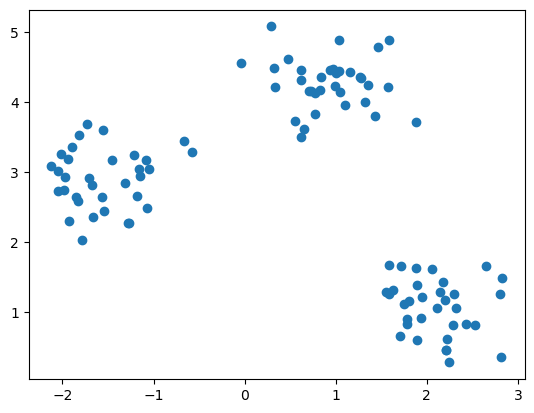

In [4]:
# Génération de données
X, y = make_blobs(n_samples=100, centers=3, cluster_std=0.4, random_state=0)
plt.scatter(X[:,0], X[:,1])

In [20]:
%set_env OMP_NUM_THREADS=1
# déclaration d'une var d'env sur notebook pour éviter futurwarning => mais ne fonctionne pas ici
# pas besoin sous IDE spyder

env: OMP_NUM_THREADS=1


C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


-30.870531280140675

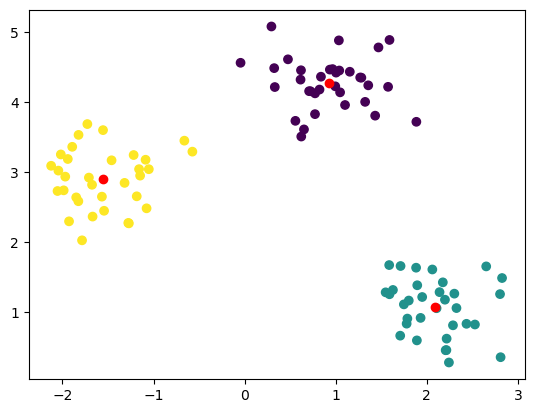

In [7]:
model = KMeans(n_clusters=3)
model.fit(X)
model.predict(X) # model.labels_ = même résultat = array 1 liste de 100 entiers 0, 1 ou 2
plt.scatter(X[:,0], X[:,1], c=model.predict(X)) # la liste prédite devient le code couleur pour nuage de points
model.cluster_centers_             # donne coordonnées des centroids ( ici 3 en dim2 et shape (3, 2))
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c='r') # voir les centroids en'r' = rouge
model.score(X) # = model.inertia_ (= +30.87) = fontion cout du model.score => -30.87    et les pts de données

### Elbow Method SI DIFFICILE DE SAVOIR LE NBRE k DE CLUSTER A TROUVER = méthode de coude ( la courbe fait un coude sur la bon k à choisir)

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

Text(0, 0.5, 'Cout du modele (Inertia)')

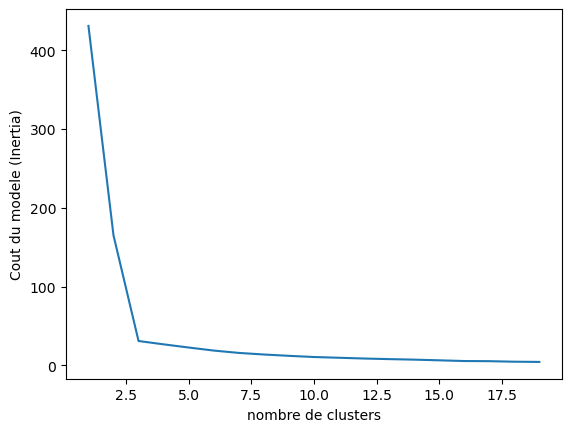

In [8]:
inertia = []
K_range = range(1, 20)
for k in K_range:
    model = KMeans(n_clusters=k).fit(X)
    inertia.append(model.inertia_)

plt.plot(K_range, inertia)
plt.xlabel('nombre de clusters')
plt.ylabel('Cout du modele (Inertia)')

## 2. Detection d'anomalies avec Isolation Forest

In [9]:
from sklearn.ensemble import IsolationForest

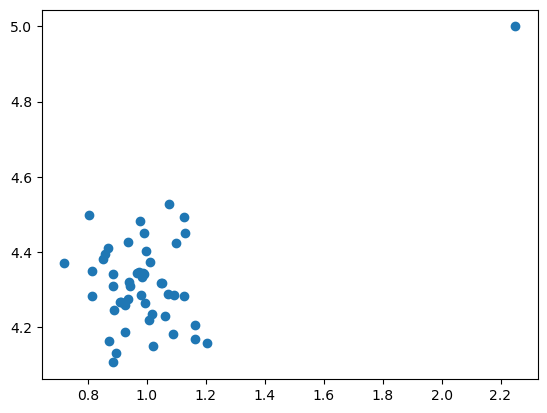

In [10]:
X, y = make_blobs(n_samples=50, centers=1, cluster_std=0.1, random_state=0)  # Générer des blobs gaussiens isotropes pour le clustering
X[-1,:] = np.array([2.25, 5])

plt.scatter(X[:,0], X[:, 1])

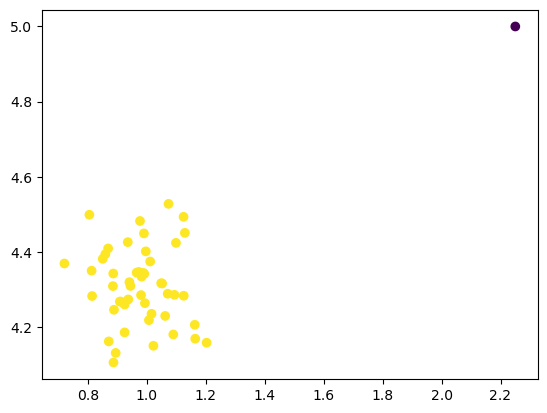

In [11]:
model = IsolationForest(contamination=0.01)  # taux de contamination = %age de données à Filtrer
model.fit(X)
model.predict(X)                    # -> array serie de +1 et -1 car  predict = +1 Normal / predict = -1 Anomalie
plt.scatter(X[:,0], X[:, 1], c=model.predict(X)) # couleur c du model.predic => couleur spéciale pour les anomalies

### Application : Digits Outliers = dataset des chiffres de 0 à 9 écrits manuellement, on cherche les outliers ( mals écrits )

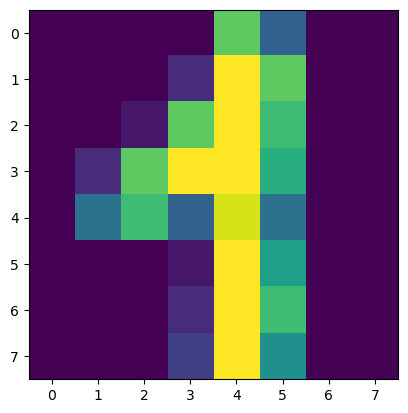

In [12]:
from sklearn.datasets import load_digits    # chargement du dataset digits

digits = load_digits()
images = digits.images
X = digits.data           # -> (1797, 64 ) = 1797 images de 64 pixels
y = digits.target         # -> (1797,) = 1797 cibles = solutions 0 ou 1 ou 2 ... 9  pas utilisées ici

plt.imshow(images[42])     # pour voir juste 1 image, la 42eme

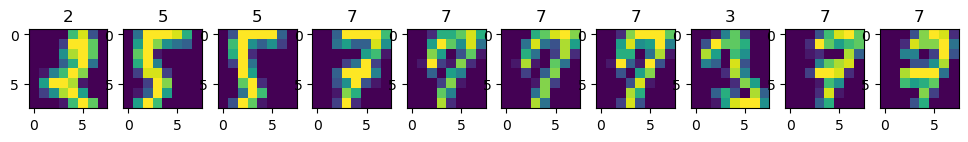

In [13]:
model = IsolationForest(random_state=0, contamination=0.02)  # taux de contamination = %age de données à Filtrer
model.fit(X)
outliers = model.predict(X) == -1 

plt.figure(figsize=(12, 3))
for i in range(10):
  plt.subplot(1, 10, i+1)  # affiche toutes les images de outliers dans un subplot de 10 images max (y en a peut-etre plus)
  plt.imshow(images[outliers][i])
  plt.title(y[outliers][i])

# VOIR AUSSI LOCAL OUTLIER FACTOR pour trouver les anomalie dans le test_set ( données du futur ) au lieu du train_set( X ici avec isolation forest)

## 2. PCA : Reduction de dimension

### Visualisation 2D

array([[-0.00000000e+00, -1.73094682e-02, -2.23428852e-01,
        -1.35913311e-01, -3.30323116e-02, -9.66340701e-02,
        -8.32942962e-03,  2.26900122e-03, -3.20516587e-04,
        -1.19308916e-01, -2.44451675e-01,  1.48512745e-01,
        -4.67319637e-02, -2.17740745e-01, -1.48136759e-02,
         4.47779415e-03, -4.94136733e-05, -7.95419453e-02,
         8.33951681e-02,  2.15915348e-01, -1.72126783e-01,
        -1.63712113e-01,  2.86444265e-02,  4.23251645e-03,
         9.85488516e-05,  6.42319146e-02,  2.54093312e-01,
        -3.56771114e-02, -2.09462533e-01, -4.31311702e-02,
         5.13118394e-02,  2.13422668e-04, -0.00000000e+00,
         1.59950889e-01,  3.68690747e-01,  1.64406782e-01,
         8.52007984e-02,  3.72983014e-02,  2.15866967e-02,
        -0.00000000e+00,  1.28865601e-03,  1.06945306e-01,
         3.03067480e-01,  2.47813041e-01,  2.09637291e-01,
         1.22325311e-02, -3.69458433e-02,  1.61485012e-03,
         6.93023660e-04, -8.35143614e-03, -5.58598806e-0

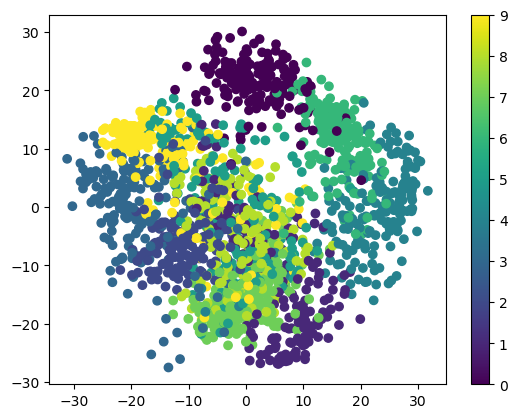

In [14]:
from sklearn.decomposition import PCA
X.shape                                       # -> (1797, 64)  = 1797 image de 94 pixels ici
model = PCA(n_components=2)    # compression en 2D
X_reduced = model.fit_transform(X)
X_reduced.shape  # (1797, 2)
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=y)
plt.colorbar()

model.components_                                                              # = array(2, 64) on a 2 composantes de 64 valeurs
                                                    # chaque composante est une combinaison linéaire de nos 64 variables ( 64 dimensions)

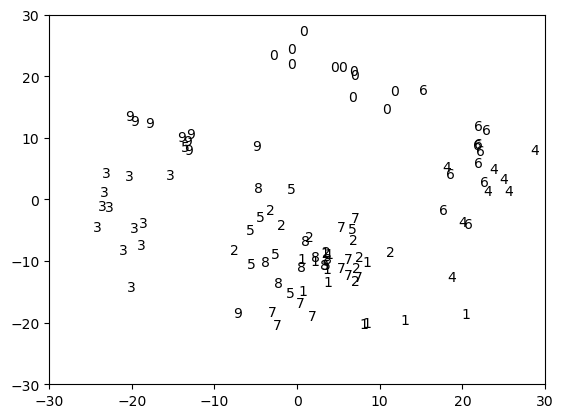

In [15]:
plt.figure()
plt.xlim(-30, 30)   # notre figure de PCA a donné x et y entre -30;+30
plt.ylim(-30, 30)   # on reprend ces axes pour afficher y cible en texte

for i in range(100):
    plt.text(X_reduced[i,0], X_reduced[i,1], str(y[i]))     # plt.text(x, y, 'texte')

### COMPRESSION DES DONNEES AVEC 95% A 99% DE VARIANCE

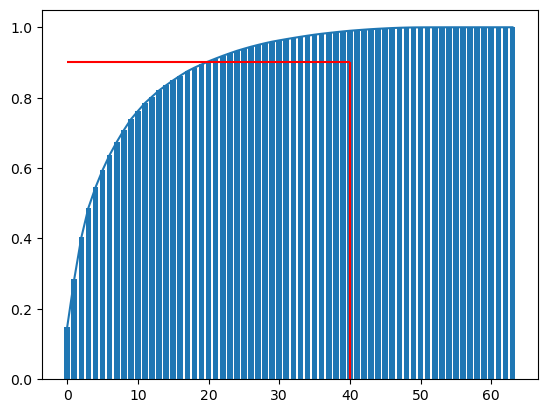

In [16]:
n_dims = X.shape[1]    # dimension de nos données = 64 colonnes
model = PCA(n_components=n_dims)        # 1 - on choisit model PCA sur ces 64 dim
X_reduced = model.fit_transform(X)      # 2 - on entraine PCA sur ces 64 dim

variances = model.explained_variance_ratio_    # 3 - on examine le %age de variance préservée par chaque composante -> array (64,)
# -> [%age de composante 1, %age de composante 2, ....]

plt.plot(np.cumsum(variances))  # -> graph somme des variances cumulées [0;1] en fonction du nbre de dimensions [0;64]

meilleur_dims = np.argmax(np.cumsum(variances) > 0.99)  # trouver l'index du 1er maximum de variances > 0.99% => index = 40
# étonnant que argmax retourne juste le 1er index ok et pas une liste....
# ON RE-ENTRAINE alors NOTRE MODEL AVEC n_components = 40  pour être sûr que 99% variance conservée
# on peut ensuite voir nos données compressées avec inverse_transforme(X_reduced)


# affichage d'un hsqitogramme de variances cumulées avec position meilleur dim
plt.bar(range(n_dims), np.cumsum(variances))
plt.hlines(0.90, 0, meilleur_dims, colors='r')
plt.vlines(meilleur_dims, 0, 0.90, colors='r')


# SOLUTION DIRECTE DE COMPRESSION AVEC 0.99% VARIANCE CONSERVée !!!!!

In [17]:
model = PCA(n_components=0.99)                                                 # on donne directement le % de variance conservé souhaité
X_reduced = model.fit_transform(X)

## affichage image originelle et image compressée avec X_decompress

Text(0.5, 1.0, 'Compressé')

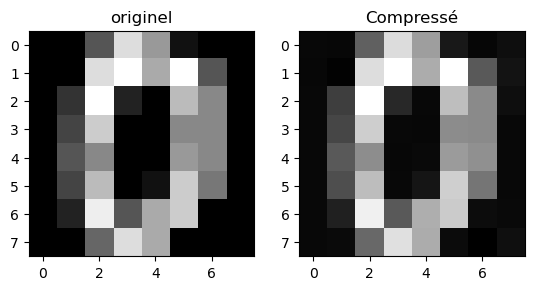

In [18]:
X_compress = model.fit_transform(X)
X_decompress = model.inverse_transform(X_compress)

plt.subplot(1, 2, 1)
plt.imshow(X[0,:].reshape((8,8)), cmap='gray')
plt.title('originel')
plt.subplot(1, 2, 2)
plt.imshow(X_decompress[0,:].reshape((8,8)), cmap='gray')
plt.title('Compressé')